# Cargas y corriente eléctrica

<p>Las baterías del Sejourner eran Rover Batteries de Lithium-Thionyl Chloride (Li-SOCl2), cuya finalidad era la de ayudar al mantenimiento eléctrico para realizar experimentos nocturnos y operaciones matutinas principalmente, y por otro lado proveer de energía para realizar comunicaciones Rover periódicas de control de estado.</p>
<table>
<tr>
<td style="vertical-align:middle; text-align:center;">![](https://mars.nasa.gov/MPF/roverpwr/batt.jpg)<br /> <i>Fuente: https://mars.nasa.gov/MPF/roverpwr/power.html</i></td>
<td style="vertical-align:middle; text-align:center;"><b>Imagen de la baterías</b></td>
</tr>
<tr>
<td style="vertical-align:middle; text-align:center;"><b>Factores que determinan la selección de baterías Li-ion para MER</b></td>
<td style="vertical-align:middle; text-align:center;">![](BatteryFacts.PNG)<br /> <i>Fuente: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.606.8642&rep=rep1&type=pdf</i></td>
</tr>
<tr>
<td style="vertical-align:middle; text-align:center;">![](BatteryTech.PNG)<br /> <i>Fuente: https://mars.nasa.gov/MPF/roverpwr/power.html</i></td>
<td style="vertical-align:middle; text-align:center;"><b>Información Técnica</b></td>
</tr>
</table>

<p>El la siguiente tabla se recopila la información necesaria para la realización de los cálculos: </p>
<table>
<tr>
<th style="vertical-align:miidle; text-align:center;">NOMBRE</th>
<th style="vertical-align:miidle; text-align:center;">VALOR</th>
</tr>
<tr>
<td style="vertical-align:miidle; text-align:center;">Voltaje de funcionamiento</td>
<td style="vertical-align:miidle; text-align:center;"><b>8-11 volts</b></td>
</tr>
<tr>
<td style="vertical-align:miidle; text-align:center;">Energía</td>
<td style="vertical-align:miidle; text-align:center;"><b>> 100 W h/Kg</b></td>
</tr>

</table>

In [156]:
from pint import UnitRegistry
pintunits = UnitRegistry()
import sympy as sp
from sympy import *
import sympy.physics.units as sp_u
import scipy.constants as sp_c
import math
import IPython

import SchemDraw as SchemDraw
import SchemDraw.elements as SDE
import numpy as np
import ahkab
from ahkab import circuit, printing, time_functions
import ahkab
import pylab as plt


init_printing()

## LEY DE OHM

La Ley de Ohm es una relación entre el voltaje, la corriente y el valor de una resistencia:

$$V = {I}*{R}$$

Si introducimos la fórmula de potencia eléctrica, obtenemos otra forma de expresar la Ley de Ohm:

$$P = {I}*{V}$$

Si despejamos la corriente para el cálculo de intensidad, la fórmula quedaría de la siguiente manera:

$$I = \frac{P}{V}$$

In [157]:
I, P, V = symbols('I P V', positive = True, real = True)

# Para la potencia cogemos un valor mayor que 100 W/h.
P = 101 * sp_u.W
# Para el voltaje cogemos un valor entre 8 y 11 voltios.
V = 10 * sp_u.V

formula = Eq(I, (P/V))
resultado = convert_to((solve(formula, I)[0]), sp_u.A)
N(resultado)

In [158]:
#Resolvemos el valos de la resistencia (R)

N(V/resultado)

Ahora que ya tenemos el valor de I, podemos dibujar un circuito sencillo:

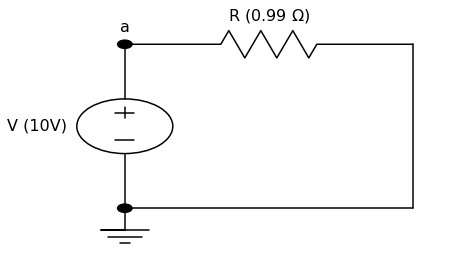

In [159]:
d = SchemDraw.Drawing()
d.add(SDE.SOURCE_V, label='V (10V)')
d.add(SDE.DOT, label = 'a')
d.add(SDE.RES, d = 'right', label = '$R$ (0.99 $\Omega$)')
d.add(SDE.LINE, d = 'down')
d.add(SDE.LINE, d = 'left')
d.add(SDE.DOT, label = '')
d.add(SDE.GND)
d.draw()

### SIMULADOR DE LA LEY DE OHM

In [160]:
iframe = '<iframe src="https://phet.colorado.edu/sims/html/ohms-law/latest/ohms-law_en.html" width="800" height="600" scrolling="no" allowfullscreen></iframe>'
IPython.display.HTML(iframe)

## Segundo ejercicio
<table>
<tr>
<td style="vertical-align:top; text-align:left;">
<p>Tres partículas cargadas con $3×10^{−9}$ amperios por segundo se encuentran en las puntas de un cuadrado de 2 pulgadas de lado.</p>
<ul>
<li>2 cargas en los vértices opuestos tienen signo «+».</li>
<li>1 tiene carga de signo contrario.</li>
</ul>
<p>Calculamos la fuerza ejercida sobre una última partícula cargada de $3×10^{−9}$ situada en la punta del cuadrado que aún queda libre:</p>
</td>
<td>
![](cargas.PNG)
</td>
</tr>
</table>

## LEY DE COULOMB

La expresión matemática de la Ley de Coulomb:

$$F = \frac{k*q_1*q_2}{d^2}$$

In [161]:
# Declaramos las variables de la ecuación
k, q_1, q_2, d, F, c = symbols('k q_1 q_2 d F c', positive = True, real = True)

e_coulomb1 = Eq(F, (k*q_1*q_2)/d**2)
e_coulomb2 = Eq(F, (k*q_1*q_2)/(d**2)*sin(45))
e_coulomb3 = Eq(F, (k*q_1*q_2)/d**2)
e_coulomb4 = Eq(F, (k*q_1*q_2)/(d**2)*cos(45))

constante = 9E9 
carga1 = 3E9 
carga2 = 3E9 
l = 2 * 0.0254

distancia = solve(Eq(d**2, (l**2) + (l**2)), d)[0]

fuerza1 = solve (e_coulomb1.subs([(k, constante), (q_1, carga1), (q_2, carga2), (d, distancia)]), F)[0]
fuerza2 = solve (e_coulomb2.subs([(k, constante), (q_1, carga1), (q_2, carga2), (d, distancia)]), F)[0]
fuerza3 = solve (e_coulomb3.subs([(k, constante), (q_1, carga1), (q_2, carga2), (d, distancia)]), F)[0]
fuerza4 = solve (e_coulomb4.subs([(k, constante), (q_1, carga1), (q_2, carga2), (d, distancia)]), F)[0]

fuerza = tan(fuerza1+fuerza2)/(fuerza3+fuerza4)

N(fuerza)
